# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from cc_ddpg_agent import Agent

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Instantiate and train the agent

Run the next two cells to train the agent.

In [5]:
# instantiate agent
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=2)

In [6]:
# train the agent with ddpg
def ddpg(n_episodes=500, max_t=1000, print_every=100):

    scores = []
    scores_deque = deque(maxlen=print_every)
    
    for i_episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations        # current state (for each agent)
        agent_scores = np.zeros(num_agents)          # initialize agents' scores
        agent.reset()                                # reset noise process for action exploration
        
        for t in range(max_t):
            
            actions = agent.act(states)
            
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            agent.step(t, states, actions, rewards, next_states, dones)
            
            agent_scores += rewards                         # update the score (for each agent)
            states = next_states                               # enter next states
            
            if np.any(dones):
                break

        scores_deque.append(np.mean(agent_scores))
        scores.append(np.mean(agent_scores))
        
        print('\rEpisode {} \tAverage Reward: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        
        if i_episode % print_every == 0:
            torch.save(agent.actor_local.state_dict(), 'actor_model.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_model.pth')
            print('\rEpisode {} \tAverage Reward: {:.2f}'.format(i_episode, np.mean(scores_deque)))
    
        if np.mean(scores_deque) >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\ tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'actor_solved.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_solved.pth')
            break
            
    return scores

scores = ddpg()

Episode 0 	Average Reward: 0.52
Episode 100 	Average Reward: 22.42
Episode 122 	Average Reward: 30.00
Environment solved in 122 episodes!\ tAverage Score: 30.00


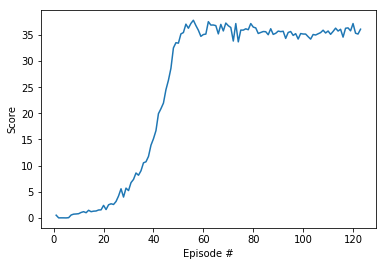

In [7]:
# Plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()